In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

**Data Understanding**

In [3]:
df = pd.read_csv('Air_Quality.csv')

In [4]:
df.shape

(52704, 10)

In [5]:
df.isnull().sum() #we have to delete the co2 columns0

Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['City'].value_counts()

City
Brasilia    8784
Cairo       8784
Dubai       8784
London      8784
New York    8784
Sydney      8784
Name: count, dtype: int64

In [8]:
df.columns.tolist()

['Date', 'City', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']

In [9]:
df['CO'].nunique()

1094

In [10]:
df['CO'].describe()

count    52704.000000
mean       258.258121
std        159.589953
min         52.000000
25%        159.000000
50%        213.000000
75%        306.000000
max       2045.000000
Name: CO, dtype: float64

In [11]:
df['CO2'].nunique()

245

In [12]:
df['NO2'].nunique()

1118

In [13]:
df['NO2'].describe()

count    52704.000000
mean        24.102998
std         19.363443
min          0.000000
25%          9.700000
50%         18.900000
75%         33.400000
max        165.900000
Name: NO2, dtype: float64

In [14]:
df['SO2'].nunique()

1164

In [15]:
df['SO2'].describe()

count    52704.000000
mean        12.569869
std         17.266623
min          0.000000
25%          2.300000
50%          5.700000
75%         16.800000
max        239.700000
Name: SO2, dtype: float64

In [16]:
df['O3'].nunique()

307

In [17]:
df['O3'].describe()

count    52704.000000
mean        60.025729
std         38.217348
min          0.000000
25%         35.000000
50%         54.000000
75%         78.000000
max        349.000000
Name: O3, dtype: float64

In [18]:
df['PM2.5'].describe()

count    52704.000000
mean        17.689931
std         15.670075
min          0.100000
25%          6.900000
50%         12.500000
75%         23.000000
max        129.500000
Name: PM2.5, dtype: float64

In [19]:
df['PM2.5'].nunique()

858

In [20]:
df['PM10'].describe()

count    52704.000000
mean        35.643143
std         48.444774
min          0.100000
25%         10.200000
50%         18.900000
75%         37.500000
max        543.900000
Name: PM10, dtype: float64

In [21]:
df['PM10'].nunique()

1751

**Data Cleaning and Transformation**

In [23]:
df.drop(columns=['CO2','Date'],inplace=True)

In [24]:
continous = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']

<Axes: >

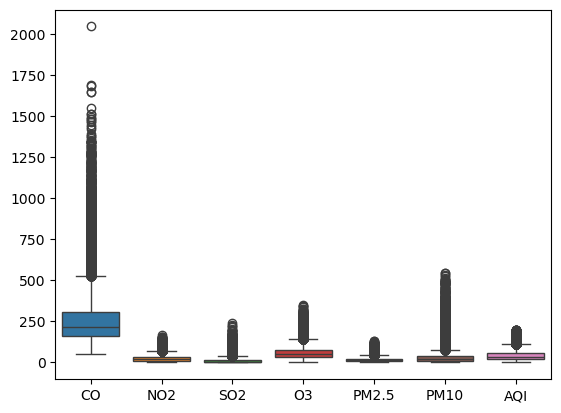

In [25]:
sns.boxplot(df[continous]) #checking outliers

In [26]:
iqr=df['CO'].quantile(0.75)-df['CO'].quantile(0.25)
lower_limit=df['CO'].quantile(0.25)-(1.5*iqr)
upper_limit=df['CO'].quantile(0.75)+(1.5*iqr)

In [27]:
df[df['CO']>1500].index.tolist()

[8801, 8970, 9139, 9140, 9162, 24968, 24969, 24970]

In [28]:
df.drop(index=[8801, 8970, 9139, 9140, 9162, 24968, 24969, 24970],inplace=True)

<Axes: >

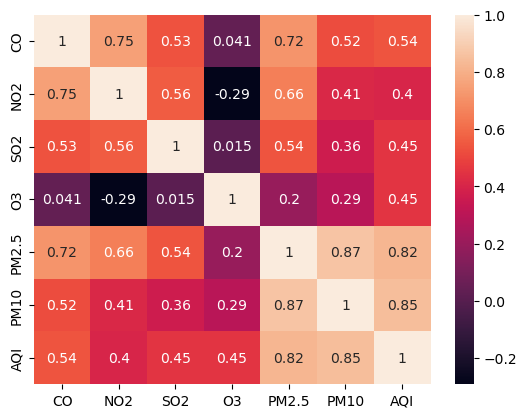

In [29]:
sns.heatmap(df[continous].corr(),annot=True)

In [30]:
df[continous].skew()

CO       2.092011
NO2      1.418891
SO2      3.216709
O3       1.412185
PM2.5    1.834294
PM10     3.425049
AQI      1.619013
dtype: float64

In [31]:
df['CO'],p = stats.boxcox(df['CO'])

In [32]:
df['NO2'],p = stats.boxcox(df['NO2']+0.00001)

In [33]:
df['SO2'],p = stats.boxcox(df['SO2']+0.00001)

In [34]:
df['PM10'],p = stats.boxcox(df['PM10'])

In [35]:
df['O3'],p = stats.boxcox(df['O3']+0.00001)

In [36]:
df['PM2.5'],p = stats.boxcox(df['PM2.5'])

In [37]:
df[continous].skew()

CO       0.007002
NO2     -0.031112
SO2      0.002598
O3      -0.157922
PM2.5   -0.008160
PM10    -0.001157
AQI      1.619013
dtype: float64

In [38]:
df = pd.get_dummies(df, columns=['City'], drop_first=True, dtype=int)

In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
features = ['CO', 'NO2', 'O3', 'PM10',
            'City_Cairo', 'City_London', 'City_New York', 'City_Sydney']

# Subset the DataFrame with selected features
X = df[features]

# It's often a good idea to standardize the features before VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame to hold the VIF values
vif_df = pd.DataFrame()
vif_df['Feature'] = features
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the result
print(vif_df)


         Feature       VIF
0             CO  5.265455
1            NO2  4.823605
2             O3  1.704906
3           PM10  2.749615
4     City_Cairo  1.539547
5    City_London  1.826786
6  City_New York  1.469385
7    City_Sydney  3.010991


In [40]:
# df.drop(columns=['PM2.5','SO2','City_Dubai'],inplace=True)

In [41]:
df.to_csv('Cleaned_Data',index=False)